# Part 2: Convolutional Neural Networks

Daniel-Alexandru Bejan (474404)
Patrick Schaper (534366)

For this assignment you are going to use the dataset IML-2022-Anglo-Saxion-Runes
from Introduction to Machine Learning (see BlackBoard).

There are plenty of examples of how to build convolutional neural networks. We advice
you, however, to reuse the code from your first assignment. 

This time you also need to
use convolutional layers and pooling layers.

In [16]:
import os, re, math, json, shutil, pprint
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import IPython.display as display
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
from os import listdir
from os.path import isfile, join

def display(np_image):
    """
    This is a display function that we have added to show numpy images at full size
    If you pass in an image with 3 channels, it will be displayed in RGB
    If you passn in an image with 1 channel, it will be displayed in grayscale
    """
    dpi = matplotlib.rcParams['figure.dpi']
    if len(np_image.shape) == 3:
        height, width, depth = np_image.shape
    else:
        height, width = np_image.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axis that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image in either RGB or grayscale (depending on the amount of dimensions)
    if (len(np_image.shape) >= 3):
        ax.imshow(np_image)
    else:
        ax.imshow(np_image, cmap='gray')

    plt.show()

Loading the data into dataframes

Number of images: 3030


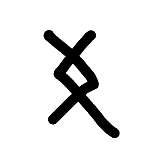

In [20]:
path = './MLBD-dataset-IML-2022-Anglo-Saxion-Runes'
images_original = io.imread_collection(os.path.join(f'{path}/*.png'))
print(f'Number of images: {len(images_original)}')
display(images_original[0])

Creating a new dataframe with the labels and the image names separated.

In [21]:
images_with_features = []

for file_name in listdir(path):
    full_path = join(path, file_name)
    if isfile(full_path):
        if re.match(r".*\.png$", full_path):
            image_label = file_name.split('_')[0].lower()
            image_number = file_name.split('_')[2].lower() + "_" + file_name.split('_')[3].lower()

            image_definition = [image_number, image_label]

            images_with_features.append(image_definition)

labeled_images = pd.DataFrame(images_with_features, columns=["rune_id", "label"])

In [22]:
labeled_images.head(10)

,rune_id,label
0,160547_2025030270.png,ash
1,160547_2549270937.png,ash
2,160547_3669898631.png,ash
3,160547_4105113150.png,ash
4,160547_4272441664.png,ash
5,160547_4538430006.png,ash
6,160547_7060350912.png,ash
7,160547_7724475204.png,ash
8,160547_8403188040.png,ash
9,160547_9446549830.png,ash


As it is stated into the the assignment we are going to experiment with different network structures. 

Therefore, we would have to:

- Experiment with at least 6 different network structures with minimum of 2 convolutional layers per network.
- Difference with and without dropout.


In [ ]:
BATCH_SIZE = 128
EPOCHS = 10
# BATCH_SIZE = 32
IMG_SIZE = (128, 128)

In [ ]:
# recognize digits from local fonts
probabilities = model.predict(font_digits, steps=1)
predicted_labels = np.argmax(probabilities, axis=1)
display_digits(font_digits, predicted_labels, font_labels, "predictions from local fonts (bad predictions in red)", N)

# recognize validation digits
probabilities = model.predict(validation_digits, steps=1)
predicted_labels = np.argmax(probabilities, axis=1)
display_top_unrecognized(validation_digits, predicted_labels, validation_labels, N, 7)

In [ ]:
def get_model():
    
    return 

Train and validate the model

Visualize the results